# Chebyshev polynomials

In [1]:
using LinearAlgebra
using Plots

# Polynomial Interpolation
Let $p_N(x)$ be a function $\mathbb{R} \to \mathbb{R}$ of degree N of the form:
$$ 
    p_N(x) = a_0 + a_1 x + \dots a_N x^N
$$

with $N \in \mathbb{N}_0, a_N \neq 0$ which approximates some function $f(x)$ $\mathbb{R} \to \mathbb{R}$

To compute the corresponding coefficients for our polynomial we select N points in the domain to obtain our polynomial equation

One possible method would be to pick N equally spaced out points across the domain

But is there a way to pick our points in a "smart" way to minimize $|f(x)-p_N(x)|$?

## Chebyshev nodes

Let's consider a domain on the interval \[−1, 1\]

Instead of taking N equally spaced points, we can try to take points that are equally distributed along a circle

Consider an angle $\theta$ in a semi circle and split it up into N equally spaced angles. $\theta_j = \pi j / N, j = 1,...,N$

And consider the coordinates $x = cos \theta$ and $y=sin\theta$

Let j $\in \mathbb{Z+}$ then the Chebyshev nodes in the interval \[−1, 1\] are

$$ 
   x_j := \cos( \pi j / N ), j = 1,...,N
$$

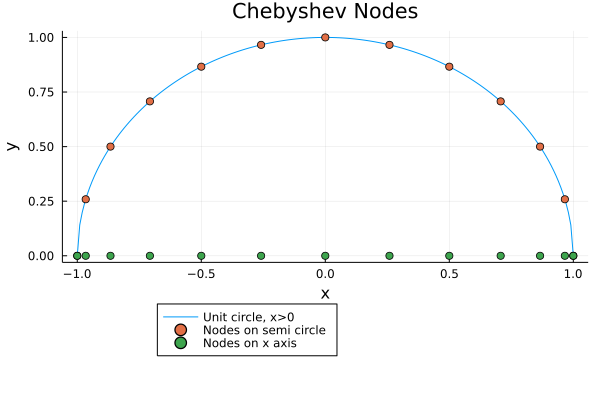

In [2]:
chebnodes(N) = [ cos( π * (n) / (N) ) for n = N:-1:0 ]
y(x) = sqrt(1-x^2)
z(x) = 0
xp = (-1:0.01:1)
N  = 12
plot(y,xp,title="Chebyshev Nodes",label="Unit circle, x>0",xlabel="x",ylabel="y")
scatter!(y,chebnodes(N), label="Nodes on semi circle")
scatter!(z,chebnodes(N),label="Nodes on x axis")
plot!(legend = :outerbottom,legendcolumns=3)

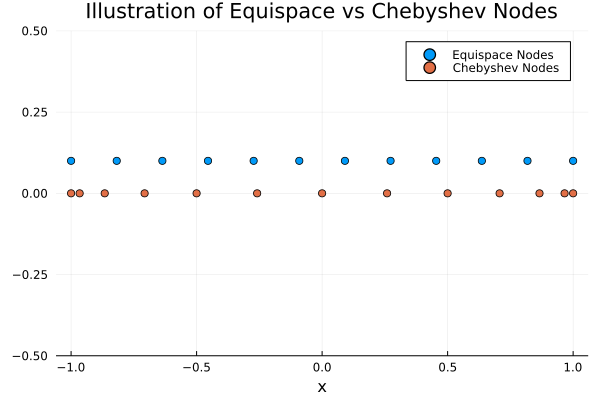

In [3]:
h(x) = 0.1
scatter(h, LinRange(-1, 1, N), label="Equispace Nodes",ylims=(-0.5,0.5),yaxis=false,title="Illustration of Equispace vs Chebyshev Nodes",xlabel="x")
scatter!(z,chebnodes(N),label="Chebyshev Nodes")

Consider the complex number $z=x+iy$ Then
$$x = \frac{1}{2}(z + z^{−1}) = cos \theta$$

Let $n\in \mathbb{Z}$ Then we define the nth Chebyshev polynomial as the real part of the function $z^n$ on the unit circle
$$T_n(\cos\theta)= \frac{z^n-z^{-n}}{2}=\cos(n\theta)$$

Consider the following

$$\frac{z^n-z^{-n}}{2}(z^1-z^{-1})= 2xT_n(x)$$ 

We can rearrange this to get:

$$\frac{z^n-z^{-n}}{2}(z^1-z^{-1}) = \frac{z^{n+1}-z^{-n-1}}{2} + \frac{z^{n-1}-z^{-n+1}}{2}$$

$$2xT_n(x) =(T_{n+1}(x)+T_{n-1}(x)) $$

Rearranging we get a recursive relation:
$$T_{n+1}(x) = 2xT_n(x) - T_{n-1}(x) $$

Also notice that $T_{0}(cos\theta)=cos(0) = 1$ and $T_{1}(cos\theta)=cos\theta$

## Chebyshev basis
Chebyshev basis is given by the recursion

$$
    T_0(x) = 1
$$

$$
T_1(x) = x
$$

$$
T_{n+1}(x) = 2 x T_n(x) - T_{n-1}(x)
$$

$$
T_0(x) = 1 \\
T_1(x) = x \\
T_2(x) = 2x^2 - 1 \\
T_3(x) = 4x^3 - 3x \\
T_4(x) = 8x^4 - 8x^2 + 1 \\
T_5(x) = 16x^5 - 20x^3 + 5x 
$$

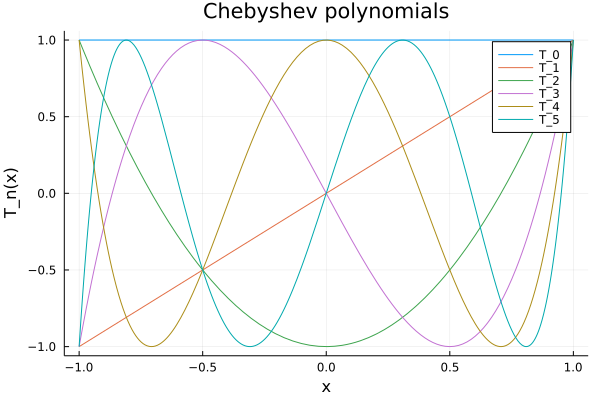

In [4]:
T_0(x) = 1
T_1(x) = x
T_2(x) = 2x^2 - 1
T_3(x) = 4x^3 - 3x
T_4(x) = 8x^4 - 8x^2 + 1
T_5(x) = 16x^5 - 20x^3 + 5x

xp = (-1:0.1:1)

plot(T_0, xp, label = "T_0",title="Chebyshev polynomials",xlabel="x",ylabel="T_n(x)")
plot!(T_1, label = "T_1")
plot!(T_2, label = "T_2")
plot!(T_3, label = "T_3")
plot!(T_4, label = "T_4")
plot!(T_5, label = "T_5")

Interesting Note:
$$
{\displaystyle {\begin{aligned}T_{n}(-x)&=(-1)^{n}\,T_{n}(x)={\begin{cases}T_{n}(x)\quad &~{\text{ for }}~n~{\text{ even}}\\\\-T_{n}(x)\quad &~{\text{ for }}~n~{\text{ odd}}\end{cases}}\\\end{aligned}}}
$$

Another observation: $T_{n} = 2^{n-1} +$ lower order terms


# Runge's Phenomenon/Witch of Agnesi
Consider the function $f : [-1, 1] \to \mathbb{R}$, 
$$
   f(x) = \frac{1}{1 + a^2x^2}
$$

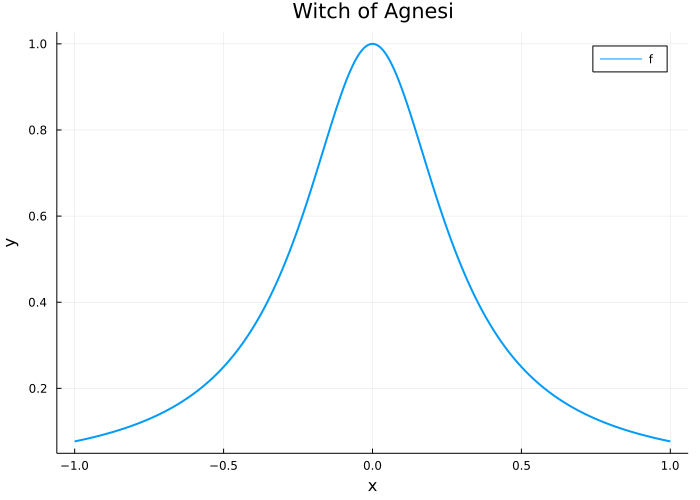

In [5]:
f = x -> 1 / (1 + 12 * x^2)
xp = range(-1, 1, length=500)
plt = plot(xp, f.(xp), lw=2, label = "f", size=(700, 500),title="Witch of Agnesi", xlabel="x", ylabel="y")

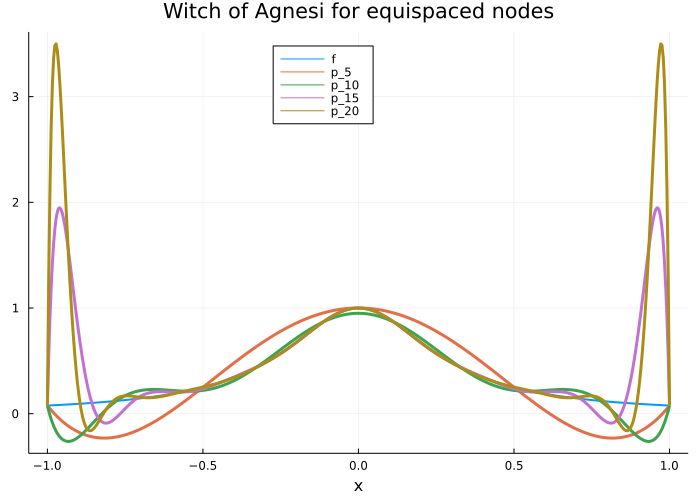

In [6]:
#from lecture 6
get_coeffs(X, F) =  [ x^n for x in X, n=0:length(X) ] \ F
myevalpoly(xp::AbstractVector, f::Function, X) = evalpoly.(xp, Ref(get_coeffs(X, f.(X))))

f = x -> 1 / (1 + 12 * x^2)

xp = range(-1, 1, length=500)
plt = plot(xp, f.(xp), lw=2, label = "f", size=(700, 500), legend = :top,xlabel="x",title="Witch of Agnesi for equispaced nodes")
for N in [5, 10, 15, 20]
    plot!(xp, myevalpoly(xp, f, range(-1,1,length=N)), lw=3, label = ("p_$(N)"))
end
plt

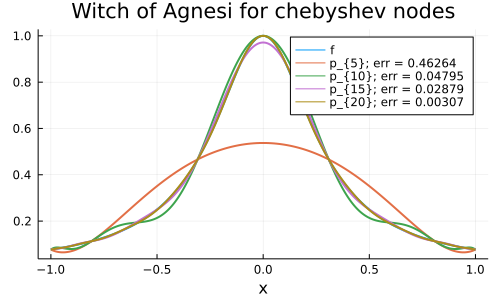

In [7]:
#from lecture 6
chebnodes(N) = cos.(range(0, pi, length=N+1))
f = x -> 1 / (1 + 12 * x^2)

xp = range(-1, 1, length=500)
plt = plot(xp, f.(xp), lw=2, label = "f", size=(500, 300), legend = :topright,xlabel="x",title="Witch of Agnesi for chebyshev nodes")
for N in [5, 10, 15, 20]
    pN = myevalpoly(xp, f, chebnodes(N)); err = norm(f.(xp)-pN, Inf)
    plot!(xp, pN, lw=2, label = ("p_{$(N)}; err = $(round(err, digits=5))"))
end
plt

Recall that any Polynomial can be rewritten in the form:
$$p_N(x)=\prod _{{i=1}}^{N}(x-x_{i}) = (x-x_{1})(x-x_{2})\dots(x-x_{N}) $$

First we observe that our Chebyshev polynomial $|T_n(x)| = | cos(n* arccos(x)| \leq 1$

And recall that our domain is on the interval \[-1,1\]

$$|(x − x_1)· · ·(x − x_n)| = \frac{1}{2^{n−1}}|T_n(x)| \leq \frac{1}{2^{n−1}}$$

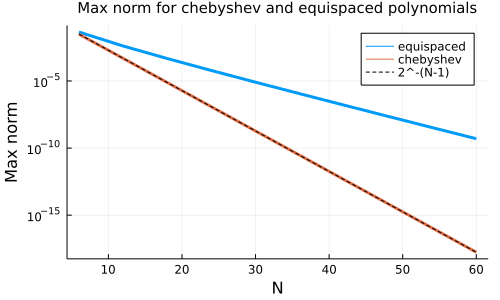

In [8]:
chebnodes(N) = [ cos( π * (n) / (N) ) for n = N:-1:0 ]
eval_L(x, X) = prod( (x - xn) for xn in X )
norm_L(X) = maximum( abs( eval_L(x, X) ) for x in range(-1, 1, length=10_000) )
NN = 6:6:60
testval = [2.0^-(N-1) for N in NN]
nrm_equi = [ norm_L(range(-1, 1, length=N+1)) for N in NN ]
nrm_cheb = [ norm_L(chebnodes(N)) for N in NN ]
plot(NN, nrm_equi, lw=3, label = "equispaced", size = (500, 300),ylabel="Max norm", xlabel="N",titlefontsize=10,title="Max norm for chebyshev and equispaced polynomials")
plot!(NN, nrm_cheb, lw=3, label = "chebyshev", yscale = :log10)
plot!(NN, testval, lw=1,c=:black,label = "2^-(N-1)",ls=:dash)

# Error 
**Remainder Theorem:** Let $f \in C^{N+1}([x_0, x_N])$ and $p_N(x)$ the interpolant on the nodes $x_0 < \dots < x_N$. Then, for every $x \in [x_0, x_N]$ there exists $\xi = \xi(x)$ s.t. 
$$
    R(x) = f(x) - p_N(x) 
    = 
    (x - x_0) (x - x_1) \cdots (x - x_N) \frac{f^{(N+1)}(\xi)}{(N+1)!}
$$

$$f(x)-p_N(x)={\frac  {f^{{(N+1)}}(\xi )}{(N+1)!}}\prod _{{i=1}}^{N}(x-x_{i})$$

Then for our chebyshev polynomial

$$\left|f(x)-p_N(x)\right|\leq {\frac  {1}{2^{{N}}(N+1)!}}\max _{{\xi \in [-1,1]}}\left|f^{{(N+1)}}(\xi )\right|.
$$

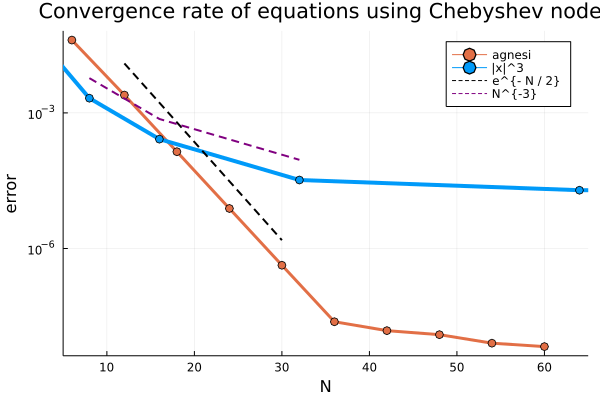

In [9]:
# Convergence for an analytic function:
f3 = x -> abs(x)^3
xe = range(-1,1,length=10_000)
NN3 = (2).^(2:8)
err3 = [ norm( myevalpoly(xe, f3, chebnodes(N)) - f3.(xe), Inf ) for N in NN3 ]

fa = x ->  1 / (1+4*x^2)
NNa = 6:6:60
erra = [ norm( myevalpoly(xe, fa, chebnodes(N)) - fa.(xe), Inf ) for N in NNa ]
plot(NNa, erra, lw=3, label = "agnesi", m=:o, ms=4, c=2, yscale = :log10, ylabel = "error",xlabel = "N", title="Convergence rate of equations using Chebyshev nodes")
plot!(NN3, err3, lw=4, label =  "|x|^3", m=:o, ms=4, c=1, xlims = [5, 65])
plot!(NNa[2:5], 5*exp.(-1/2*NNa[2:5]), lw=2, ls=:dash, c=:black, label = "e^{- N / 2}")
plot!(NN3[2:4], 3*NN3[2:4].^(-3), lw=2, ls=:dash, c=:purple, label = "N^{-3}")

### Barycentric Interpolation 
The baycentric polynomial for a given function f can be expressed as 
$$
p_n(x) =  \frac{\sum_{j=0}^n\frac{w_jf_j}{(x − x_j)}}{\sum_{j=0}^n\frac{w_j}{(x − x_j)}}
$$
with $w_j$ as our barycentric weight 

$$
w_j = \frac{1}{\prod_{k\neq j} (x_j − x_k)}
$$

Observations:
- Uses Lagrange formula 

In [10]:
#Source: Chapter 4 https://github.com/cortner/ApxThyApp

function chebbary(x, f, N)
    p = q = 0.0 
    for j = 0:N
        xj = cos(π*j/N)
        fj = f(xj)
        λj = (-1)^j * 0.5 * (1 + (1 <= j < N))
        p += fj * λj / (x - xj)
        q += λj / (x - xj)
    end
    return p/q
end

chebbary (generic function with 1 method)

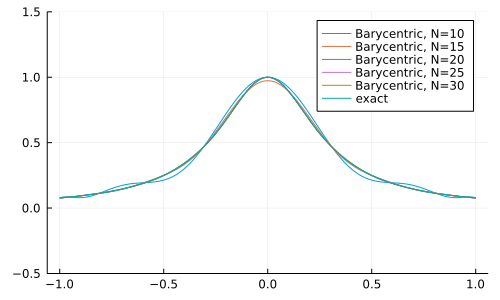

In [11]:
f = x -> 1 / (1 + 12 * x^2)
xp = range(-1+0.123*1e-6, 1-0.123*1e-6, length=500)
plot(xp, chebbary.(xp, f, 10), ylims=[-0.5, 1.5],label="Barycentric, N=10",size=(500, 300),xlabel = "x", title="Barycentric interpolation" )
plot!(xp, chebbary.(xp, f, 15), ylims=[-0.5, 1.5],label="Barycentric, N=15" )
plot!(xp, chebbary.(xp, f, 20), ylims=[-0.5, 1.5],label="Barycentric, N=20" )
plot!(xp, chebbary.(xp, f, 25), ylims=[-0.5, 1.5],label="Barycentric, N=25" )
plot!(xp, chebbary.(xp, f, 30), ylims=[-0.5, 1.5],label="Barycentric, N=30" )
plot!(f, label="exact")

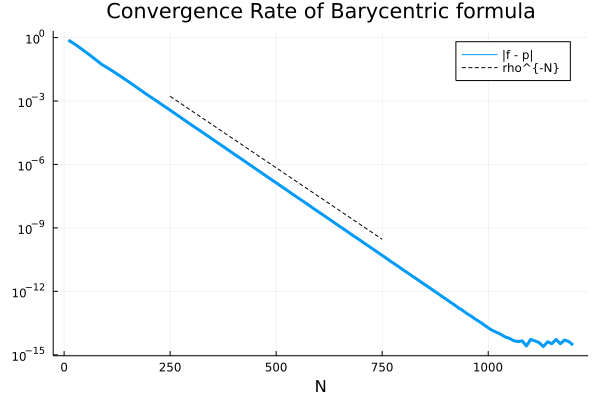

In [12]:
#Source: Chapter 4 https://github.com/cortner/ApxThyApp
f = x -> 1 / (1 + 1000 * x^2)
NN = 10:10:1200

xerr = range(-1+0.123*1e-6, 1-0.123*1e-6, length=3_000)
err = [ norm( f.(xerr) - chebbary.(xerr, f, N), Inf )
        for N in NN ]
P2 = plot(NN, err, lw = 3, label = "|f - p|", 
         yscale = :log10, xlabel = "N", legend = :topright, 
         yticks = [1.0, 1e-3, 1e-6, 1e-9, 1e-12, 1e-15],
        title="Convergence Rate of Barycentric formula",ylabel = "error")
#plot!(NN, 0*NN .+ eps(), c=:red, ls = :dot, label = "eps" )
tt = [250, 750]
plot!(tt, 4*(1+1/sqrt(1000)).^(-tt), c=:black, ls=:dash, label = "rho^{-N}")

# References

- "Approximation Theory and Approximation Practise", by Nick Trefethen https://sites.math.washington.edu/~morrow/464_16/1ATAPfirst6chapters.pdf
- Chebyshev nodes: https://en.wikipedia.org/wiki/Chebyshev_nodes 
- Chebyshev polynomials: https://en.wikipedia.org/wiki/Chebyshev_polynomials 
- Chebyshev interpolation: https://www.math.wsu.edu/faculty/genz/448/lessons/l303.pdf
- https://www.math.ucdavis.edu/~bremer/classes/fall2018/MAT128a/lecture15.pdf
- Math 405 - Lecture 6: Interpolation
- https://web.math.princeton.edu/~nfm2/chebyshev-interpolation.pdf
- https://github.com/cortner/ApxThyApp